In [14]:
# Step 1: Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
# Step 2: Upload dataset file to Colab
from google.colab import files
uploaded = files.upload()


Saving StudentsPerformance[1].csv to StudentsPerformance[1] (1).csv


In [16]:
# Step 3: Load dataset
df = pd.read_csv("StudentsPerformance[1].csv")

# Display first 5 rows
print("First 5 Rows:")
display(df.head())

# Show basic info
print("\nDataset Info:")
df.info()

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


First 5 Rows:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB

Missing Values:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing sco

In [17]:
# Step 4: Summary statistics
print("Summary Statistics:")
display(df.describe(include='all'))


Summary Statistics:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [18]:
# Step 5: Encode categorical columns
le = LabelEncoder()
for c in cat_cols:
    df[c] = le.fit_transform(df[c])

print("After Encoding:")
display(df.head())


After Encoding:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


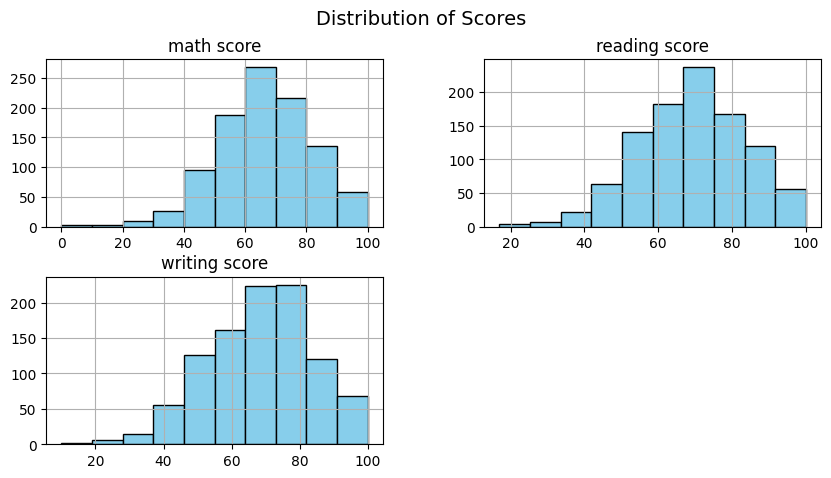

In [19]:
# Step 5a: Distribution of numerical scores
num_cols = ['math score', 'reading score', 'writing score']
df[num_cols].hist(figsize=(10,5), bins=10, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Scores", fontsize=14)
plt.show()


/tmp/ipython-input-312818870.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='math score', data=df, palette='Set2')


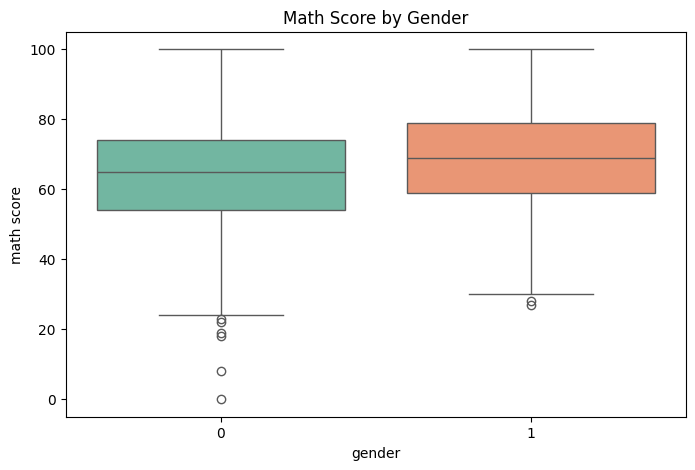

/tmp/ipython-input-312818870.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='reading score', data=df, palette='Set3')


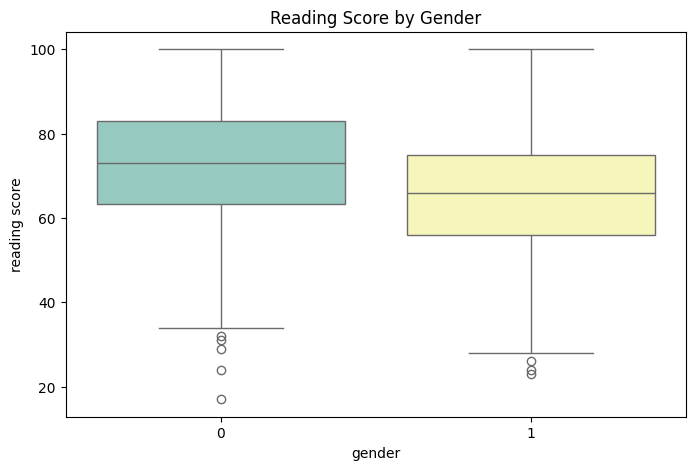

/tmp/ipython-input-312818870.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='writing score', data=df, palette='Set1')


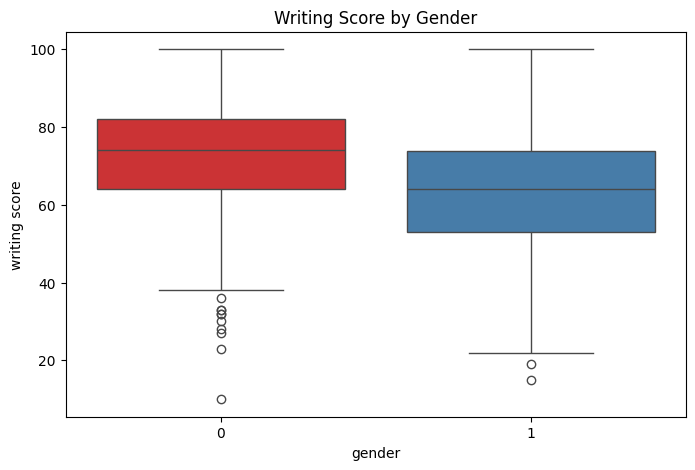

In [20]:
# Step 5b: Gender-wise performance comparison
plt.figure(figsize=(8,5))
sns.boxplot(x='gender', y='math score', data=df, palette='Set2')
plt.title("Math Score by Gender")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='gender', y='reading score', data=df, palette='Set3')
plt.title("Reading Score by Gender")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='gender', y='writing score', data=df, palette='Set1')
plt.title("Writing Score by Gender")
plt.show()


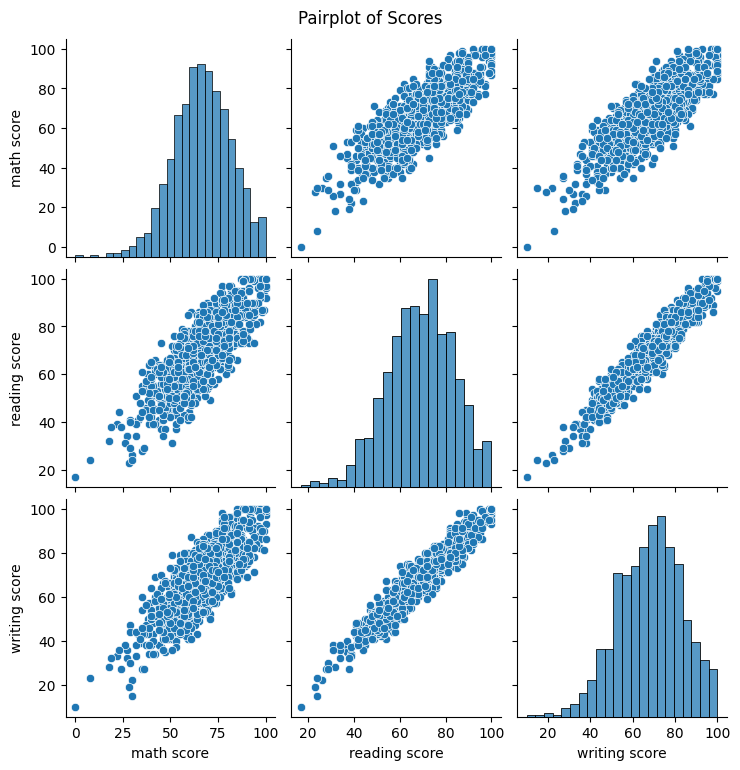

In [22]:
# Step 5c: Relationship between scores
sns.pairplot(df[num_cols])
plt.suptitle("Pairplot of Scores", y=1.02)
plt.show()


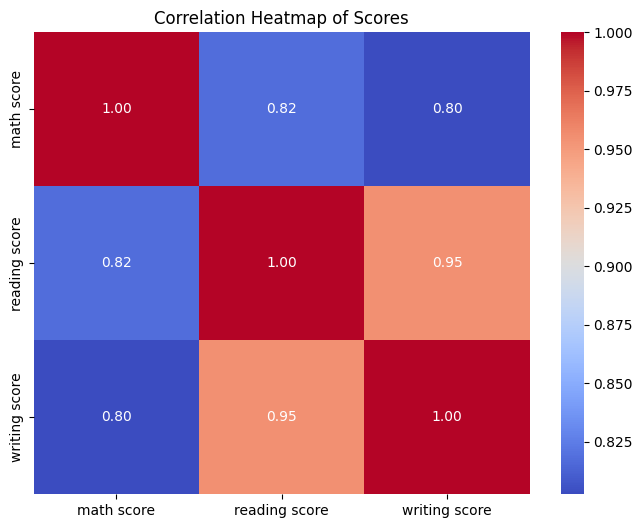

In [23]:
# Step 5d: Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Scores")
plt.show()


Dataset Shape: (1000, 8)

Summary Statistics (Numeric Columns):


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,0.482000,2.174000,2.486000,0.645000,0.642000,66.08900,69.169000,68.054000
std,0.499926,1.157179,1.829522,0.478753,0.479652,15.16308,14.600192,15.195657
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,17.000000,10.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,57.00000,59.000000,57.750000
50%,0.000000,2.000000,2.000000,1.000000,1.000000,66.00000,70.000000,69.000000
75%,1.000000,3.000000,4.000000,1.000000,1.000000,77.00000,79.000000,79.000000
max,1.000000,4.000000,5.000000,1.000000,1.000000,100.00000,100.000000,100.000000


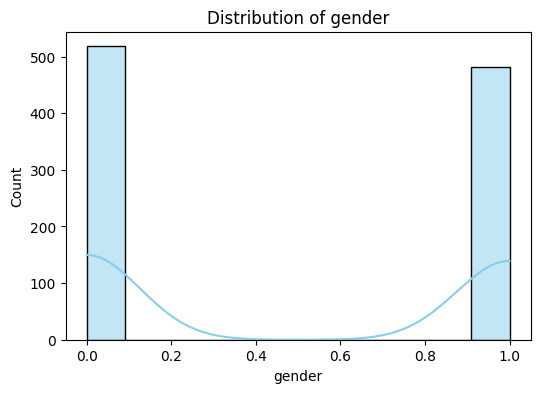

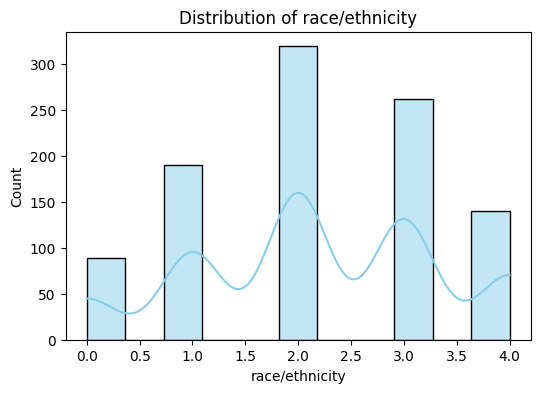

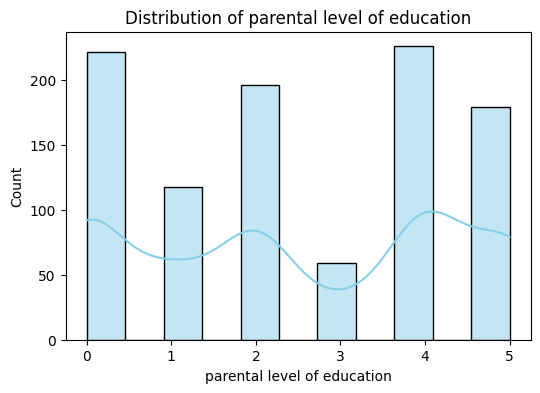

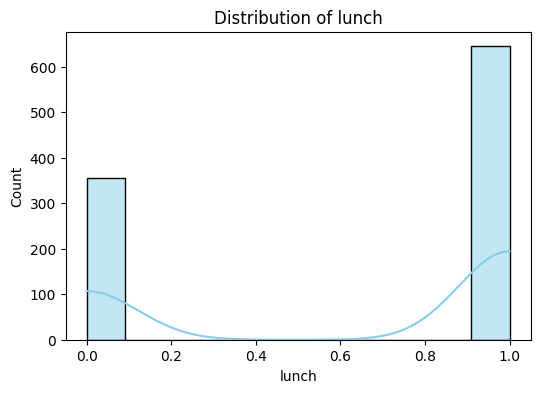

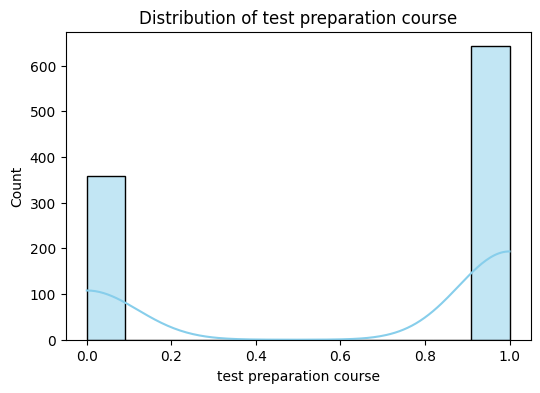

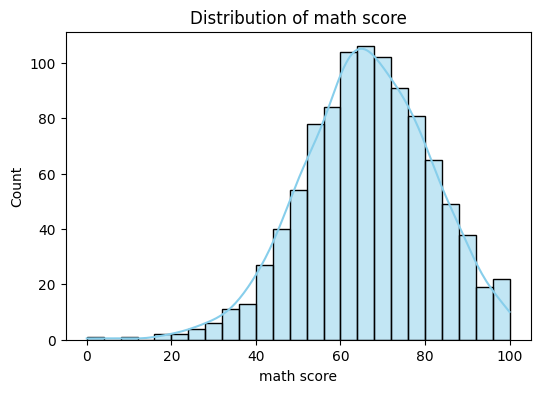

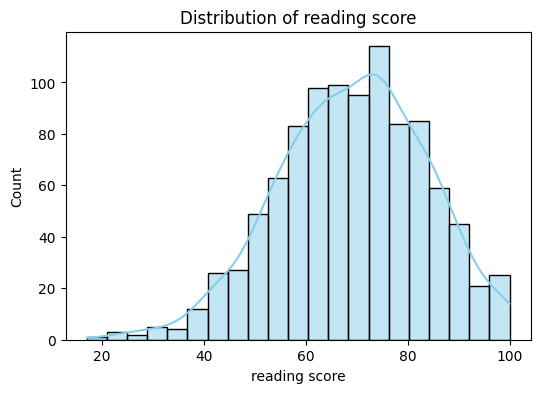

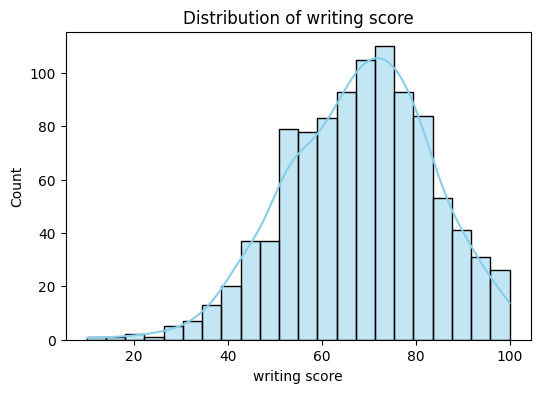

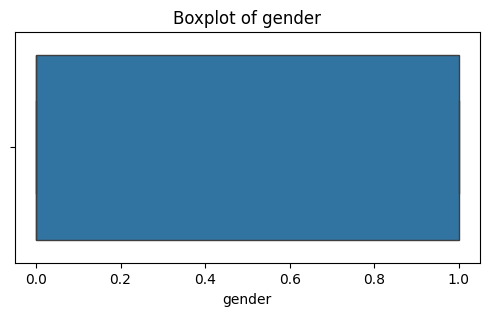

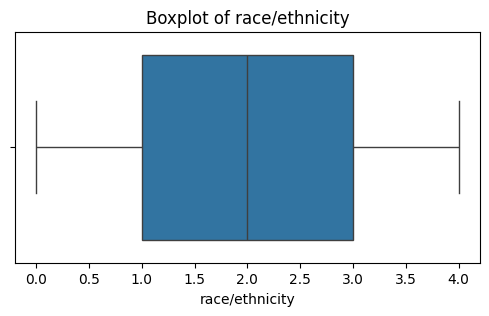

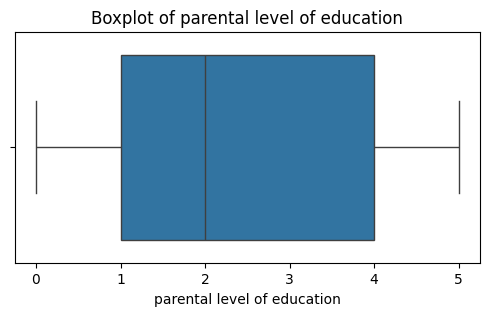

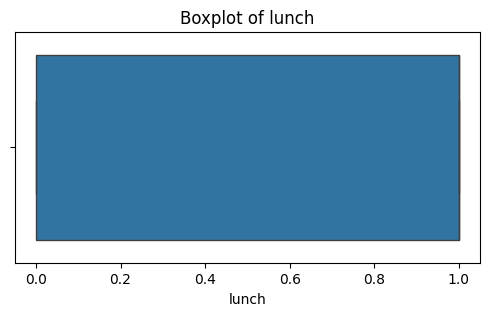

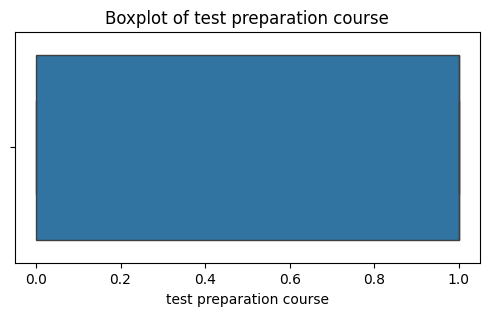

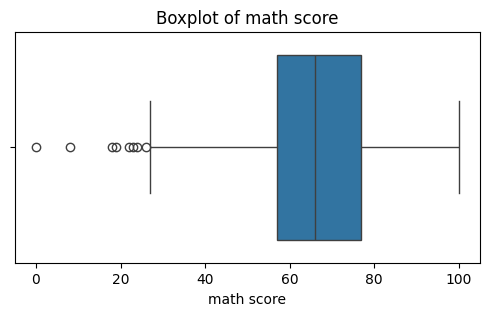

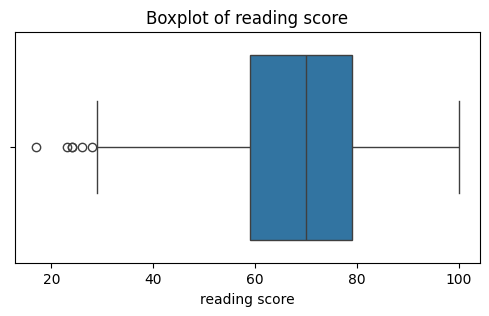

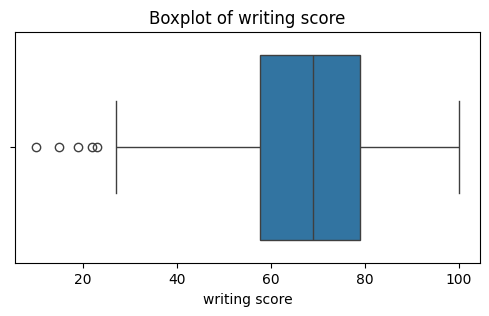

In [35]:
# ---- UNIVARIATE ANALYSIS ----

print("Dataset Shape:", df.shape)
print("\nSummary Statistics (Numeric Columns):")
display(df.describe())

# The following line is removed as all object columns were encoded in a previous step,
# leading to a ValueError. If univariate analysis on original categorical features is needed,
# it should be performed before encoding.
# print("\nSummary of Categorical Columns:")
# display(df.describe(include='object'))

# Numerical Columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# Categorical Columns (will be empty if all were encoded)
cat_cols = df.select_dtypes(include='object').columns.tolist()

# Histograms (Distribution)
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.show()

# Boxplots (Outliers + Spread)
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Countplots (Categorical) - This loop will not execute if cat_cols is empty
for col in cat_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(x=df[col], palette='Set2')
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.show()

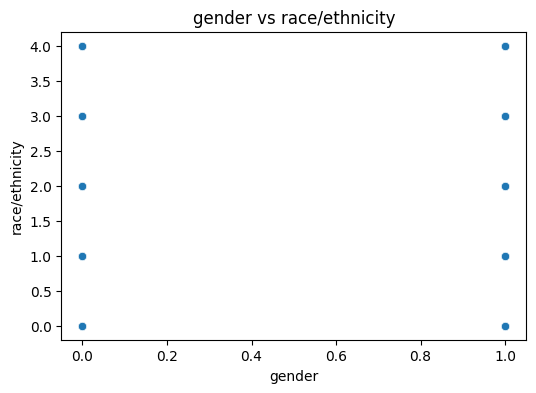

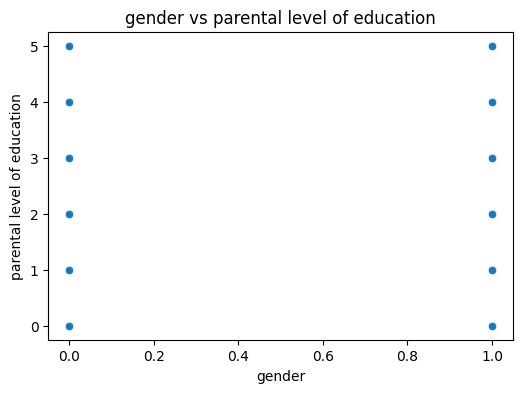

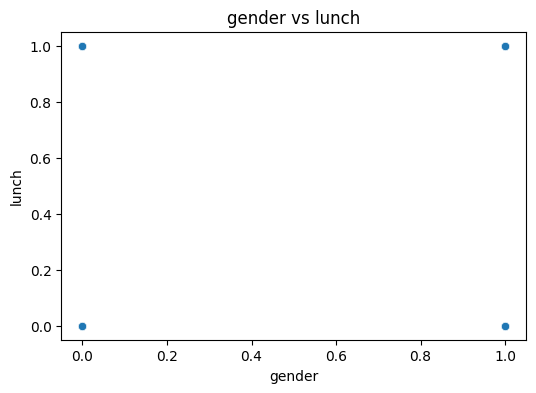

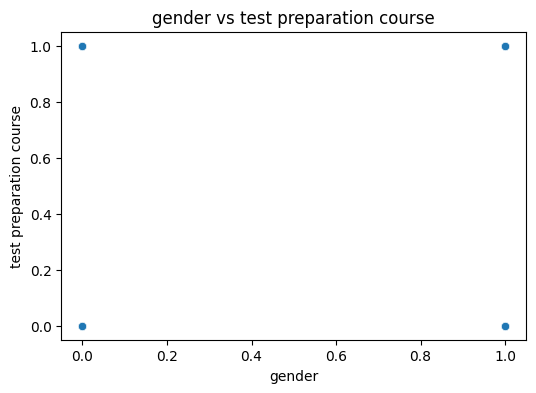

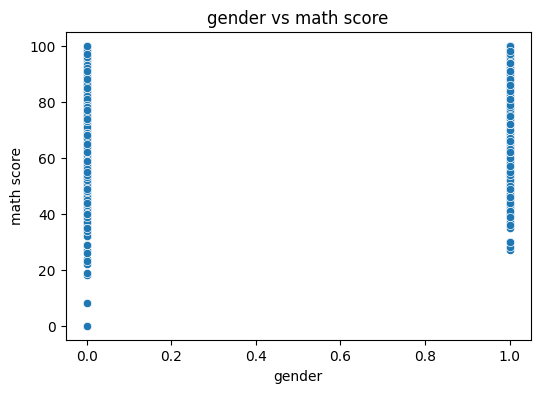

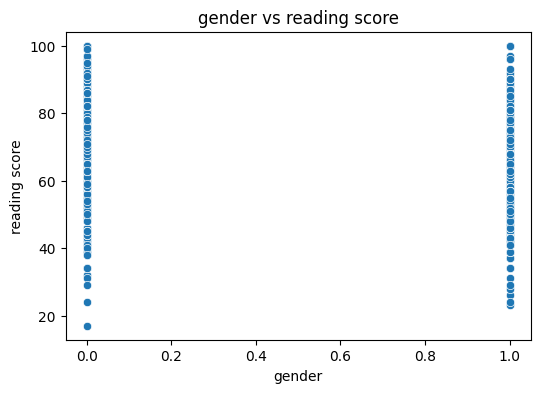

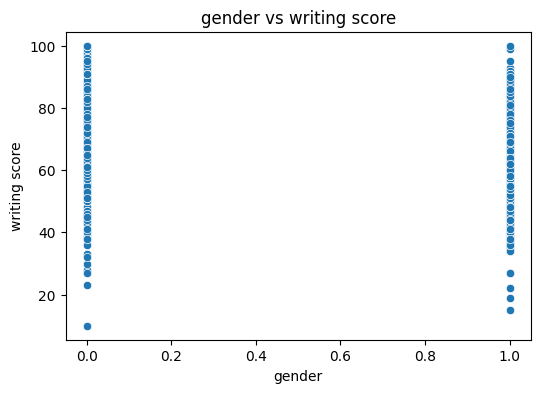

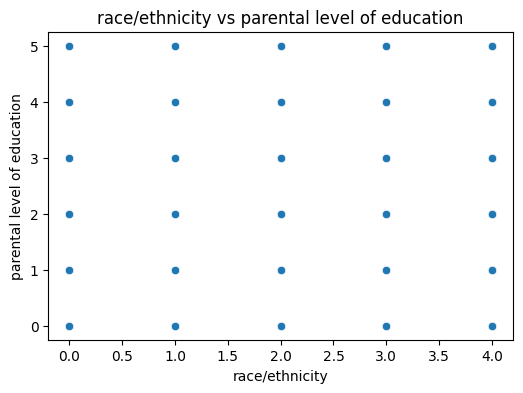

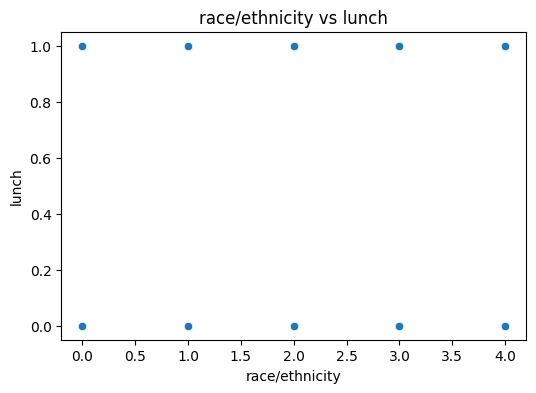

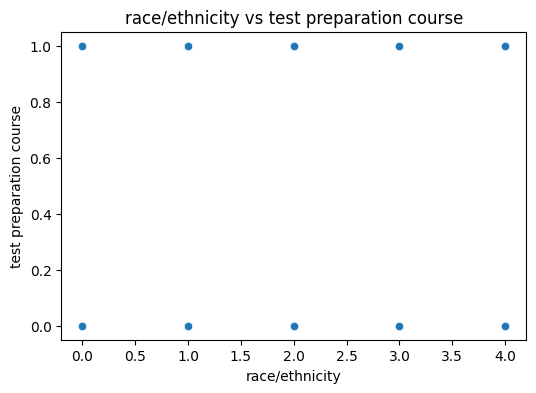

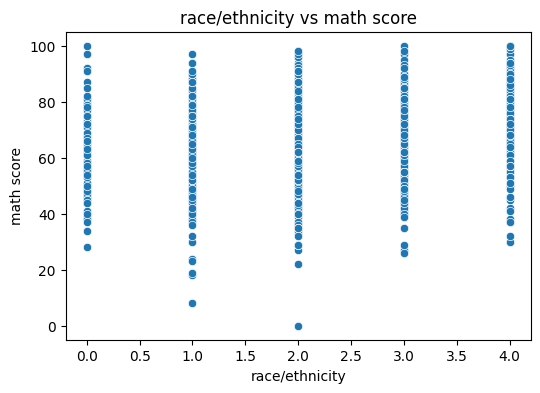

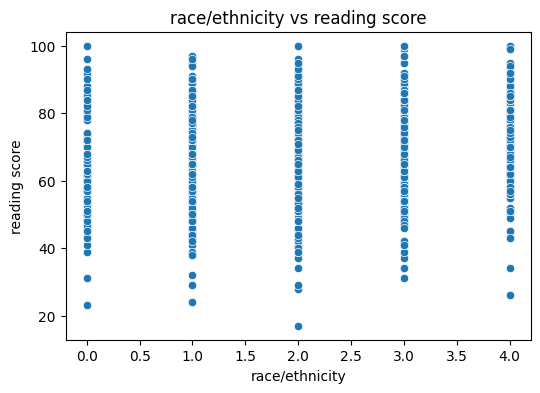

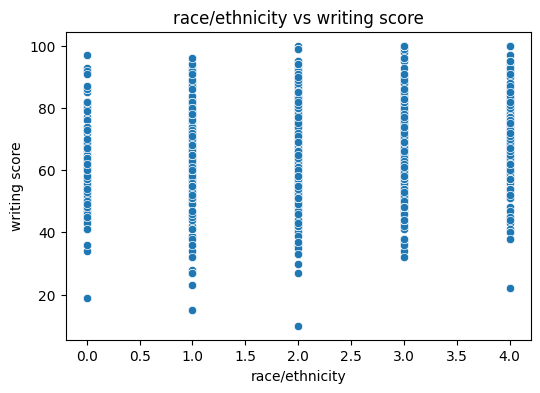

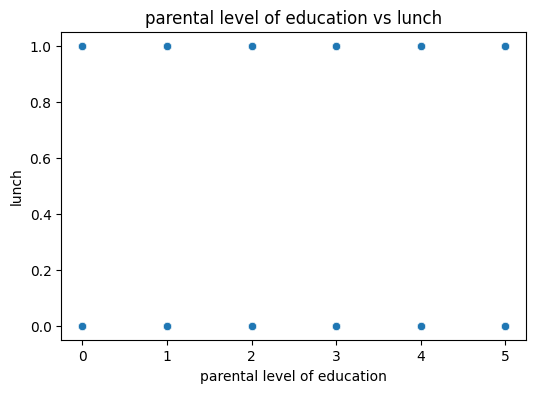

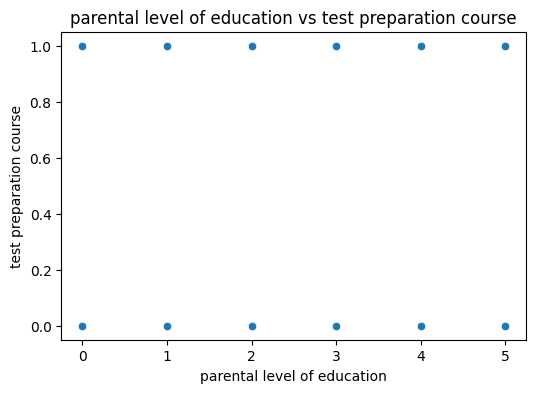

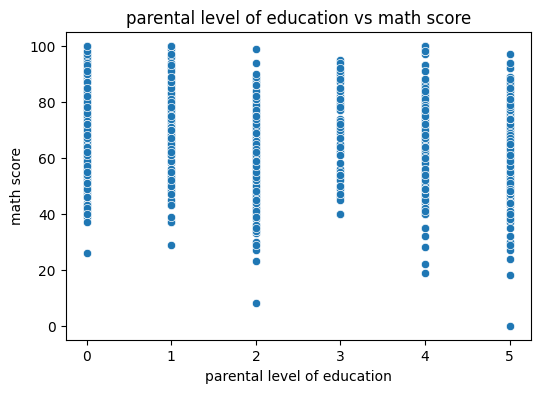

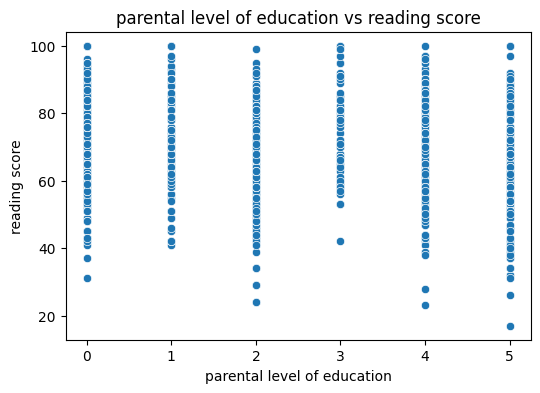

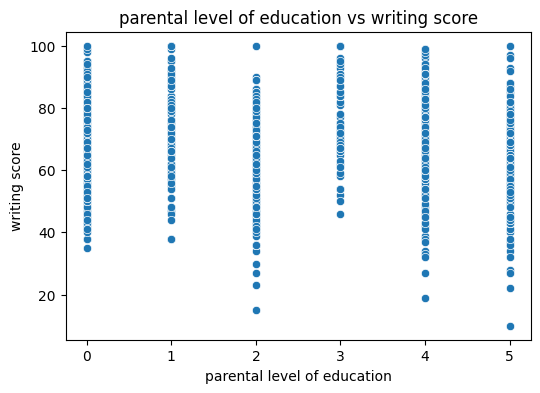

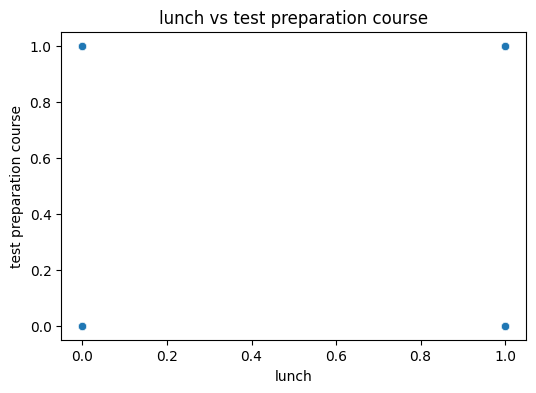

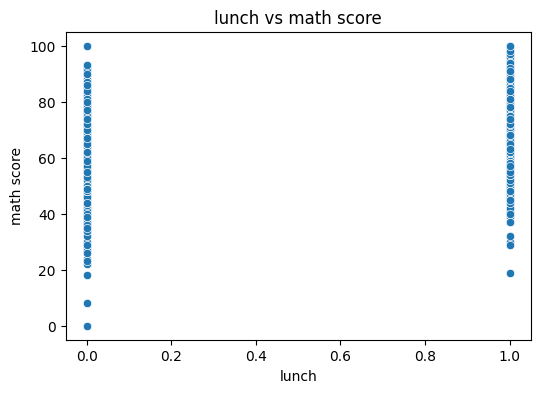

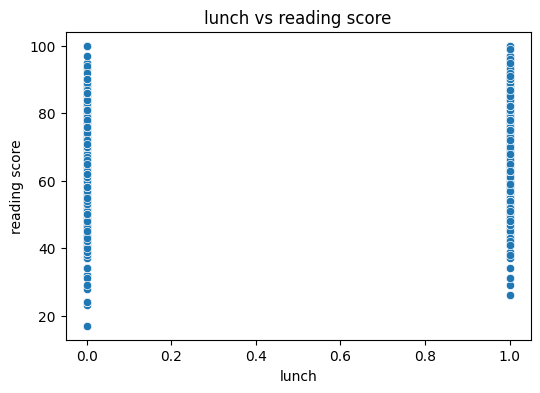

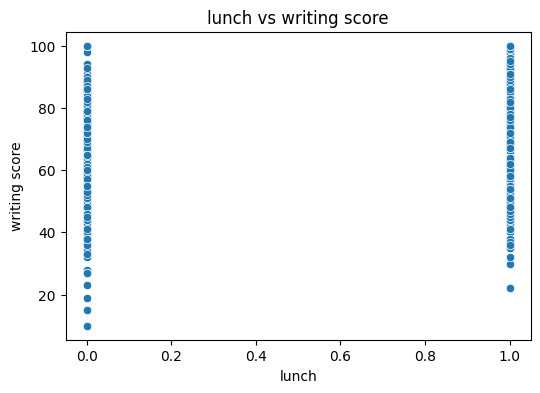

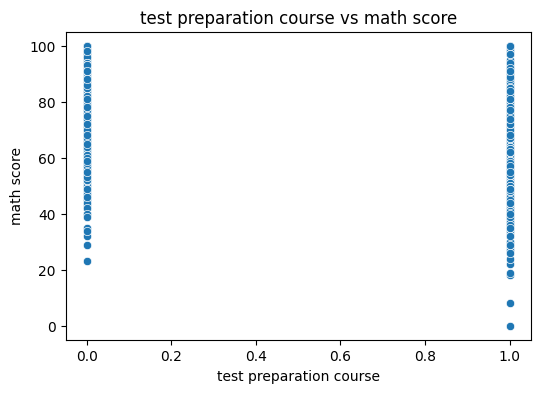

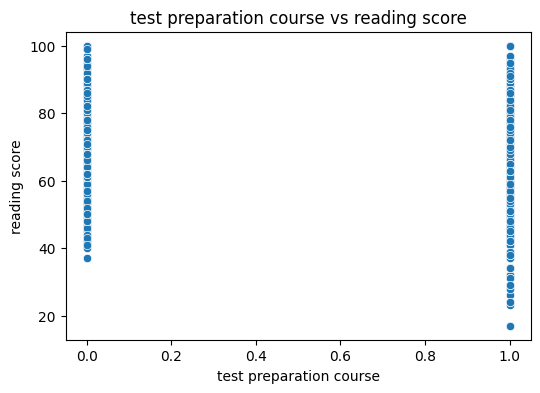

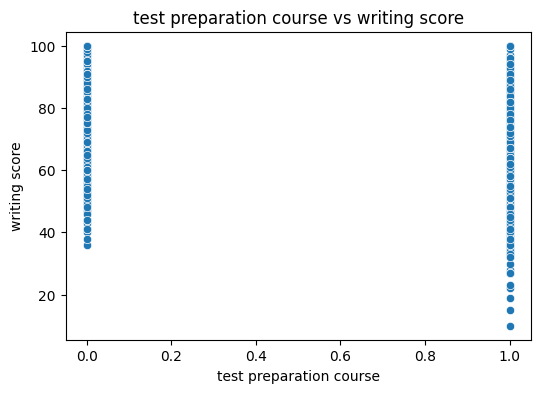

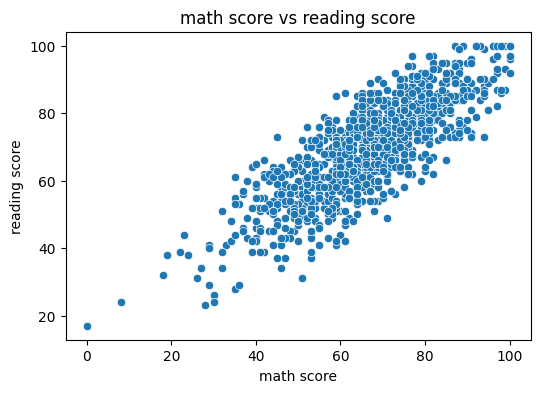

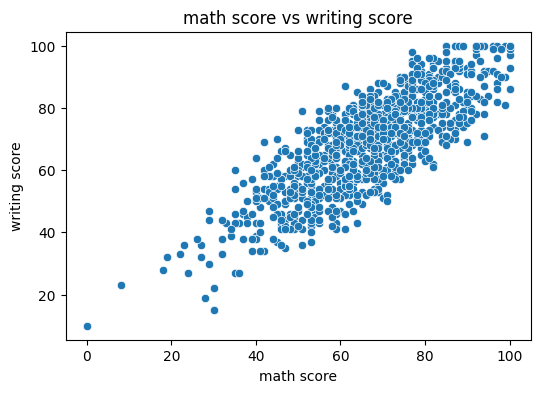

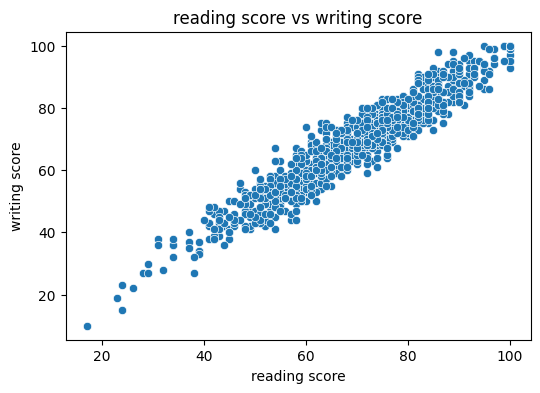

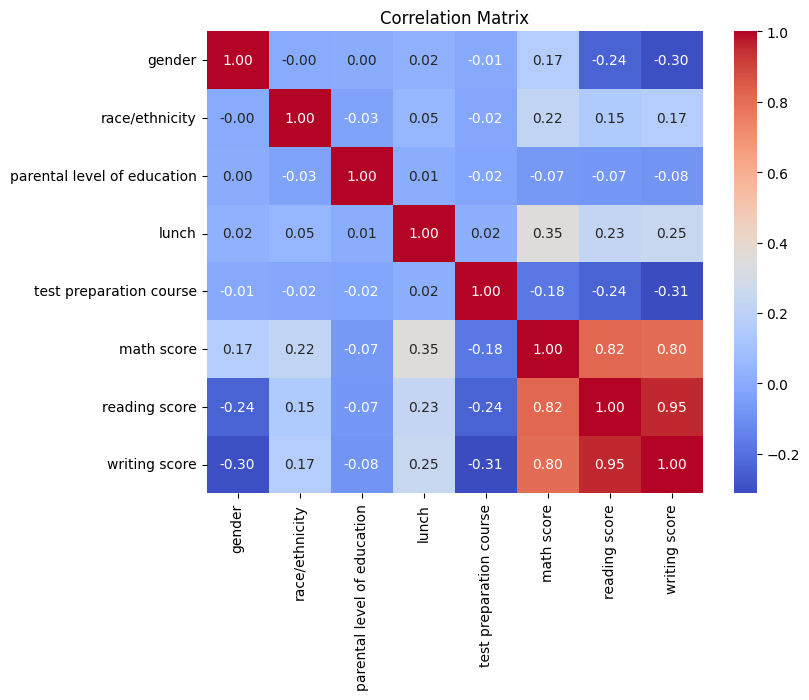

In [36]:
# ---- BIVARIATE ANALYSIS ----

# 1. NUMERIC vs NUMERIC → SCATTERPLOTS
num_cols = df.select_dtypes(include=np.number).columns.tolist()

for i in range(len(num_cols)):
    for j in range(i+1, len(num_cols)):
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=df[num_cols[i]], y=df[num_cols[j]])
        plt.title(f"{num_cols[i]} vs {num_cols[j]}")
        plt.show()

# 2. CATEGORICAL vs NUMERIC → BOXPLOTS
cat_cols = df.select_dtypes(include='object').columns.tolist()

for cat in cat_cols:
    for num in num_cols:
        plt.figure(figsize=(7,4))
        sns.boxplot(x=df[cat], y=df[num], palette='Set3')
        plt.title(f"{num} by {cat}")
        plt.xticks(rotation=45)
        plt.show()

# 3. CORRELATION MATRIX (NUMERIC VARIABLES)
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# 4. GROUPED MEANS (Categorical vs Numeric)
for cat in cat_cols:
    print(f"\nAverage Values grouped by {cat}:")
    display(df.groupby(cat)[num_cols].mean().round(2))


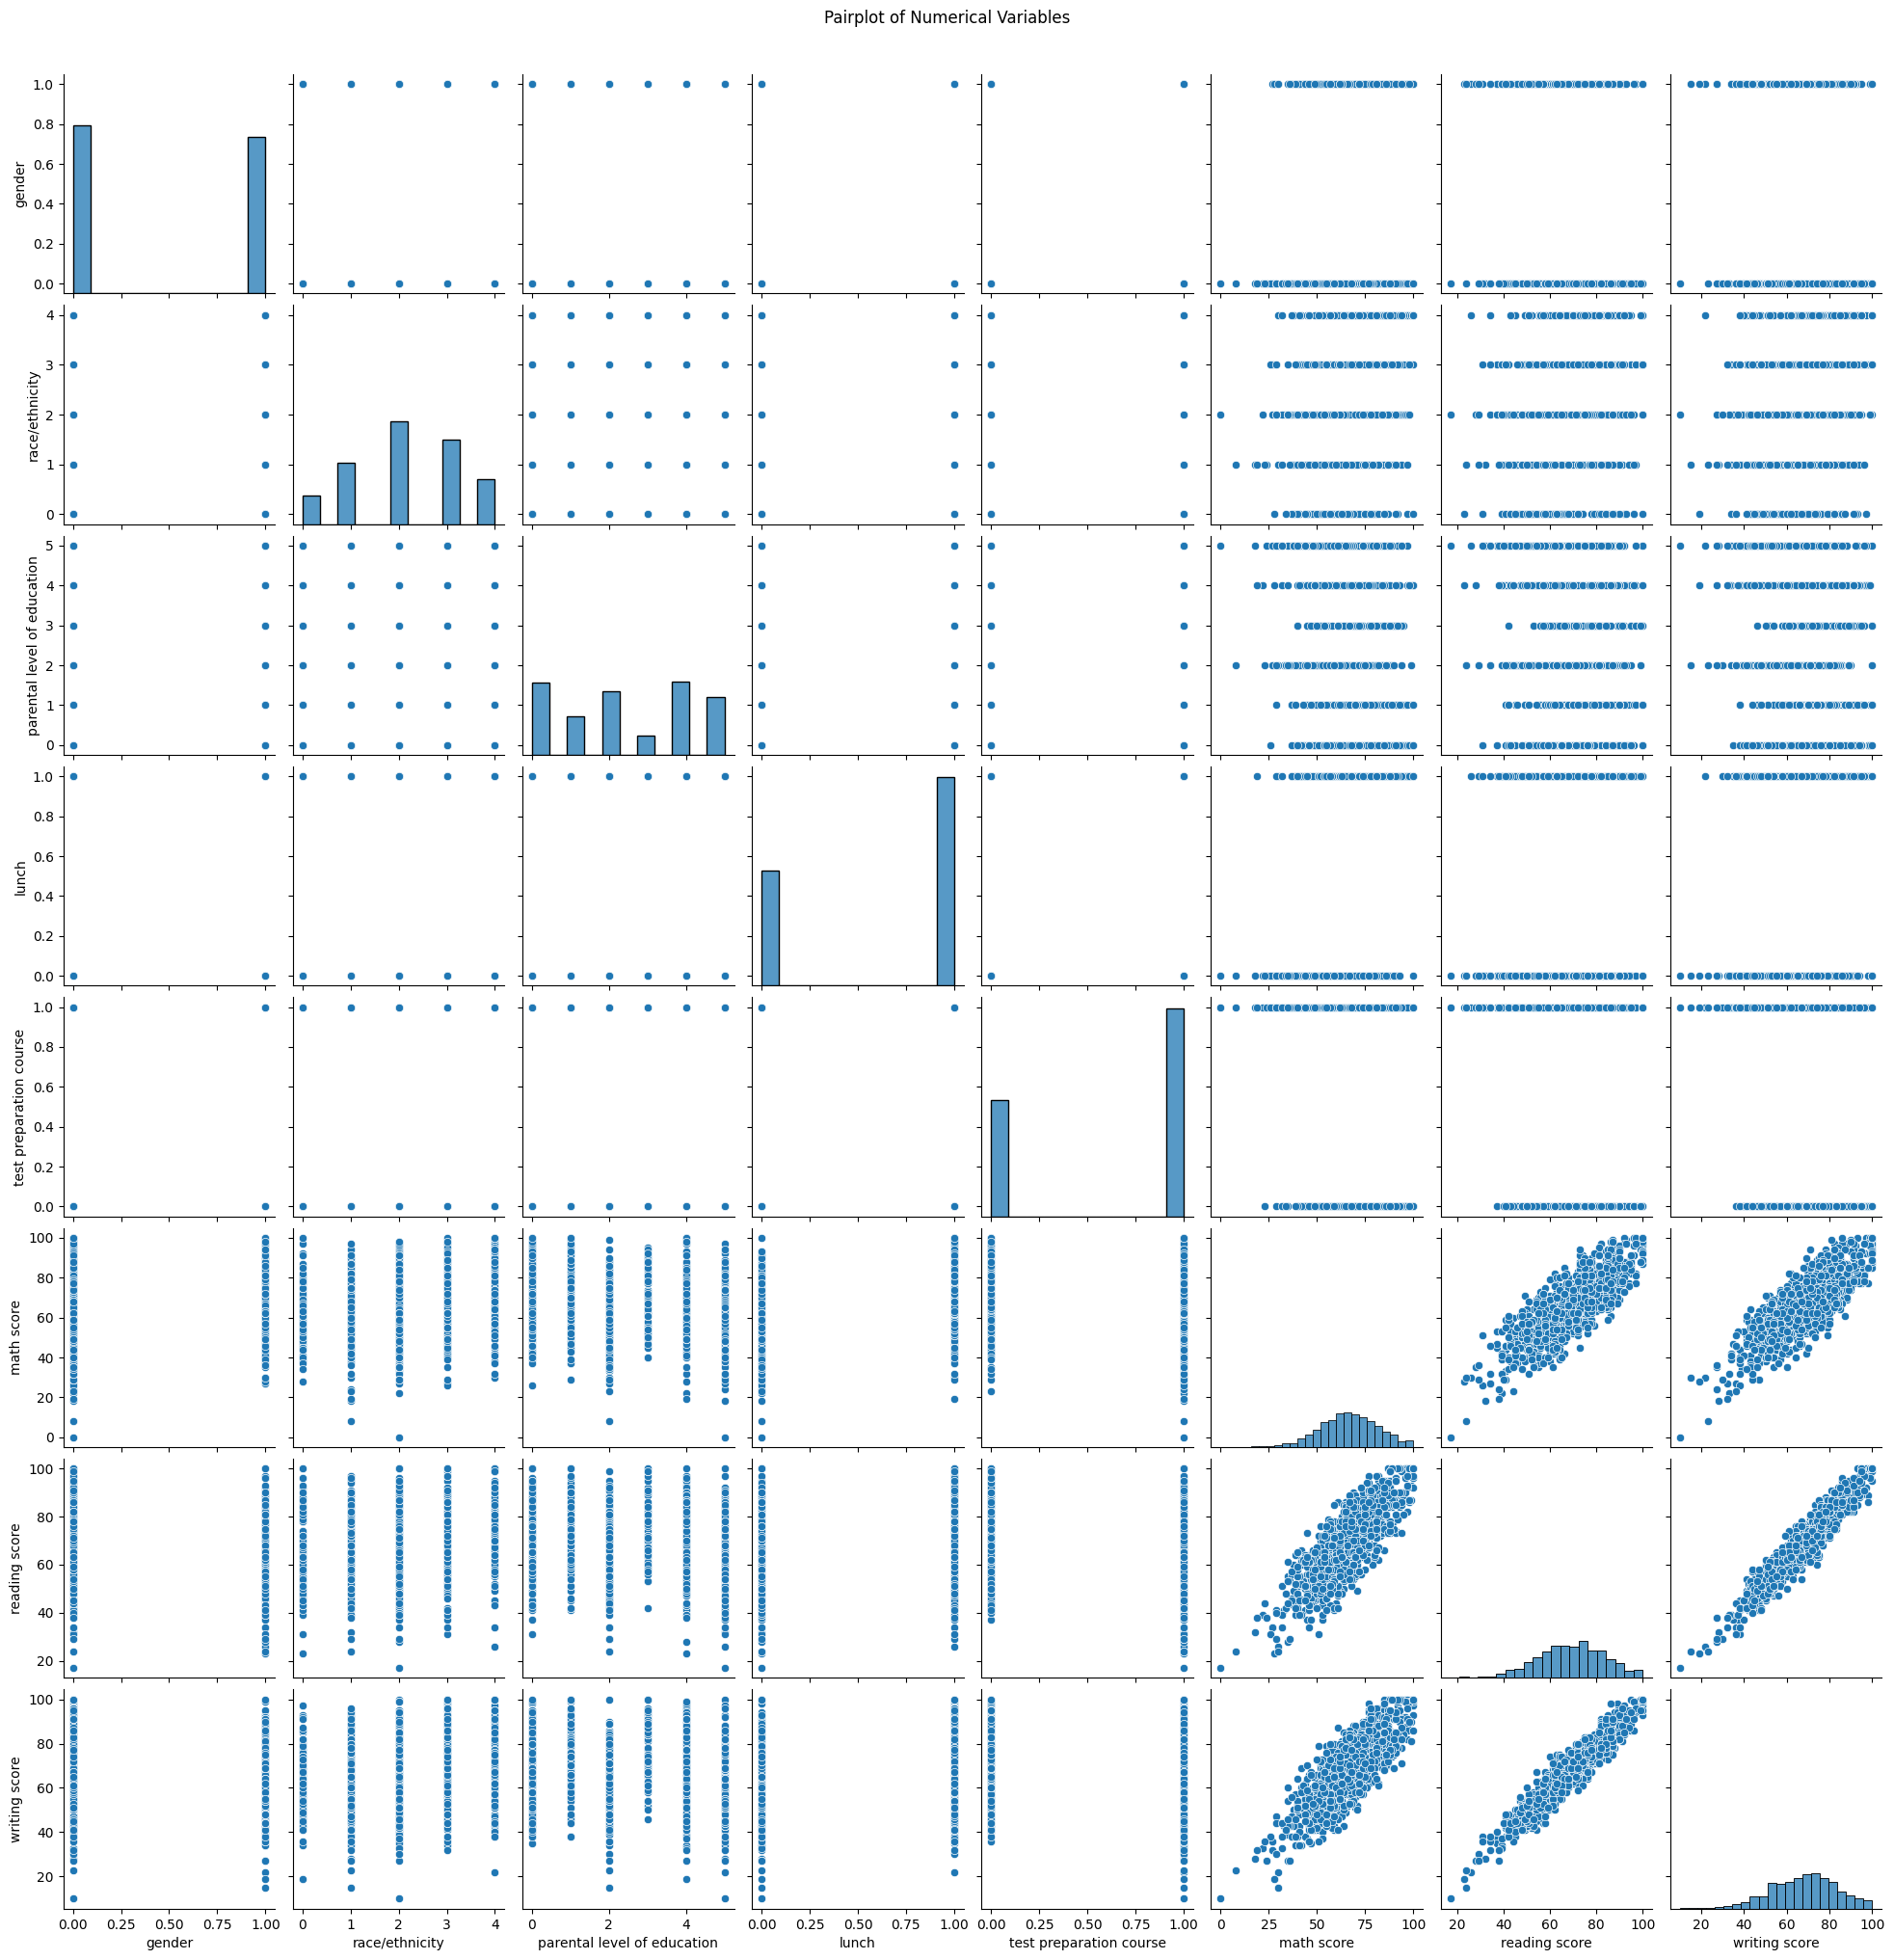

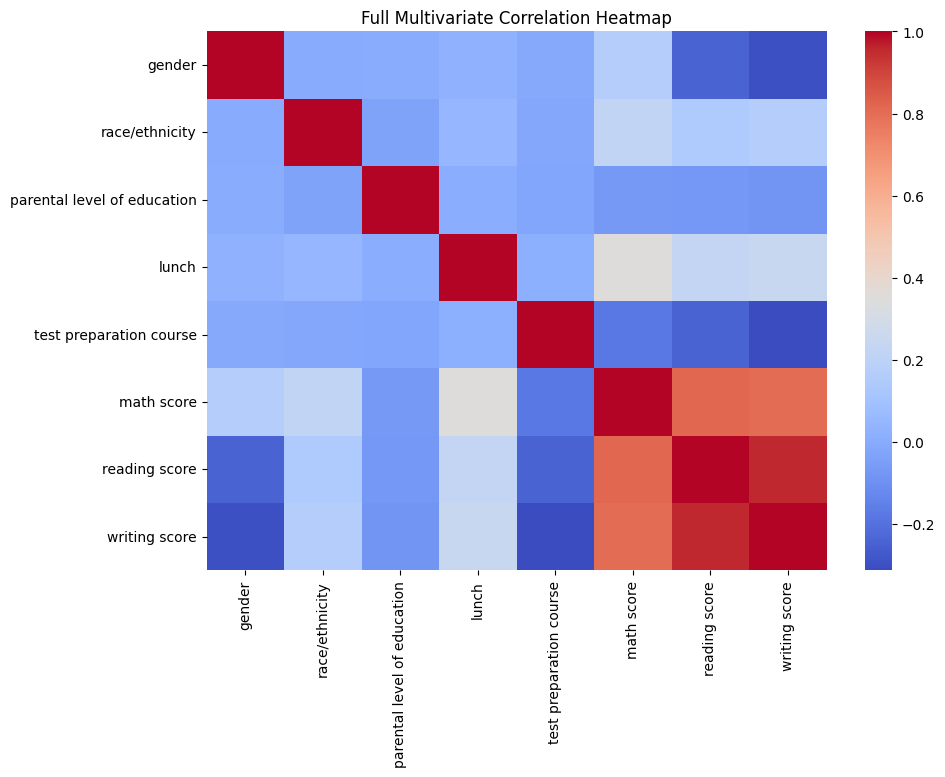

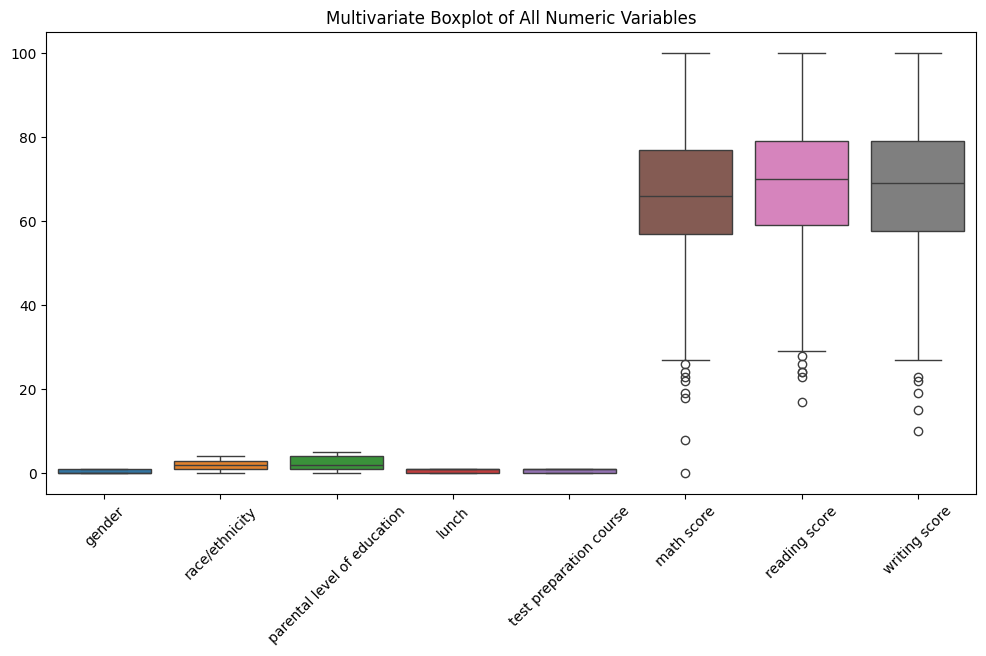

In [37]:
# ---- MULTIVARIATE ANALYSIS ----

# 1. PAIRPLOT (ALL NUMERIC VARIABLES)
sns.pairplot(df[num_cols])
plt.suptitle("Pairplot of Numerical Variables", y=1.02)
plt.show()

# 2. FULL HEATMAP (Including Encoded Categorical)
# First encode categorical variables for heatmap
df_encoded = df.copy()
for col in cat_cols:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

plt.figure(figsize=(10,7))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', annot=False)
plt.title("Full Multivariate Correlation Heatmap")
plt.show()

# 3. FACETGRID (Categorical + Numeric Multivariate Comparison)
for cat in cat_cols:
    g = sns.FacetGrid(df, col=cat, height=4)
    g.map(plt.hist, num_cols[0])  # histogram of first numeric column by category
    plt.suptitle(f"Distribution of {num_cols[0]} by {cat}")
    plt.show()

# 4. MULTIVARIATE BOXPLOT GRID
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols])
plt.title("Multivariate Boxplot of All Numeric Variables")
plt.xticks(rotation=45)
plt.show()


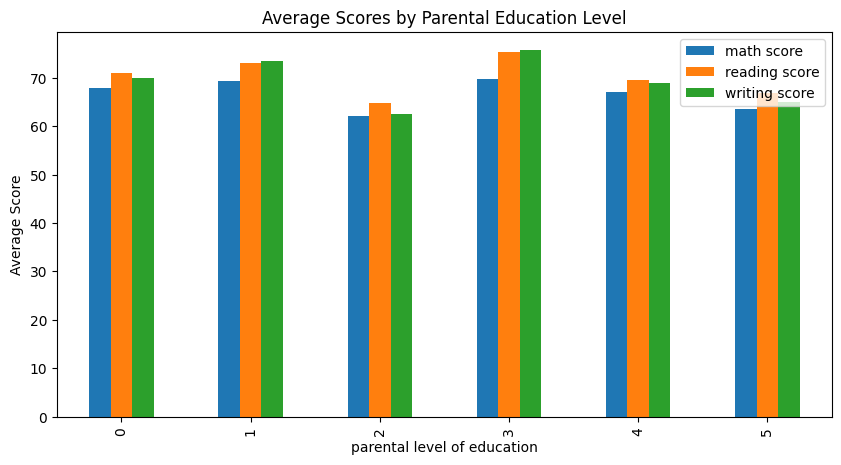

In [24]:
# Step 5e: Average scores by parental level of education
avg_scores = df.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean()
avg_scores.plot(kind='bar', figsize=(10,5))
plt.title("Average Scores by Parental Education Level")
plt.ylabel("Average Score")
plt.show()


In [25]:
# Step 6: Encode categorical variables using LabelEncoder
cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

print("After Encoding:")
display(df.head())


After Encoding:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


In [26]:
# Step 7: Define X (features) and y (target)
X = df.drop("writing score", axis=1)
y = df["writing score"]

print("Feature Columns:", X.columns.tolist())
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Feature Columns: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score']
Shape of X: (1000, 7)
Shape of y: (1000,)


SIMPLE LINEAR REGRESSION


In [27]:
# Step 8: Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (800, 7)
Testing set size: (200, 7)


In [28]:
# Step 9: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

print("✅ Model training complete!")


✅ Model training complete!


In [29]:
# Step 10: Predict test set results
y_pred = model.predict(X_test)

comparison = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
}).reset_index(drop=True)

print("Actual vs Predicted (First 10 Rows):")
display(comparison.head(10))


Actual vs Predicted (First 10 Rows):


,Actual,Predicted
0,84,88.432194
1,73,66.551850
2,72,70.830198
3,73,70.913556
4,78,81.513992
5,78,72.303080
6,63,68.821444
7,62,63.541676
8,72,72.448431
9,41,52.341793


In [30]:
# Step 11: Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("=== Model Evaluation ===")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


=== Model Evaluation ===
Mean Squared Error (MSE): 16.59
R² Score: 0.93


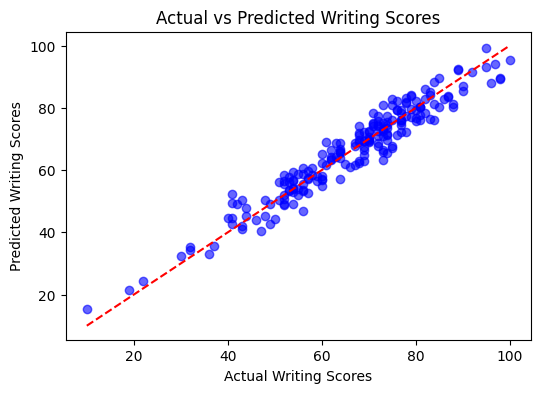

In [31]:
# Step 12: Plot Actual vs Predicted Scores
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.xlabel("Actual Writing Scores")
plt.ylabel("Predicted Writing Scores")
plt.title("Actual vs Predicted Writing Scores")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.show()


In [32]:
# Step 13: Display feature coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("Feature Coefficients:")
display(coefficients)


Feature Coefficients:


,Feature,Coefficient
6,reading score,0.689437
3,lunch,0.381751
5,math score,0.265509
1,race/ethnicity,0.068830
2,parental level of education,-0.210251
4,test preparation course,-3.289315
0,gender,-5.577300


In [33]:
# Step 14: Predict for one random sample
sample = X.iloc[[0]]
predicted_score = model.predict(sample)[0]

print("Example Input Features:")
display(sample)
print(f"\nPredicted Writing Score: {predicted_score:.2f}")


Example Input Features:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score
0,0,1,1,1,1,72,72



Predicted Writing Score: 73.46


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['gender']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'gender'}, axis=1)
              .sort_values('gender', ascending=True))
  xs = counted['gender']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('gender', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('gender')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['race/ethnicity']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'race/ethnicity'}, axis=1)
              .sort_values('race/ethnicity', ascending=True))
  xs = counted['race/ethnicity']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('race/ethnicity', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('race/ethnicity')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['parental level of education']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'parental level of education'}, axis=1)
              .sort_values('parental level of education', ascending=True))
  xs = counted['parental level of education']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('parental level of education', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('parental level of education')
_ = plt.ylabel('count()')